In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Stock_Math_Practice_Dataset.csv")

In [4]:
print(df.head())

         Date  Close_Price
0  2024-01-01       100.50
1  2024-01-02       100.36
2  2024-01-03       101.01
3  2024-01-04       102.53
4  2024-01-05       102.30


Columns in dataset are Date and Close_Price

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Close_Price'].astype(float)

0     100.50
1     100.36
2     101.01
3     102.53
4     102.30
5     102.06
6     103.64
7     104.41
8     103.94
9     104.48
10    104.02
11    103.55
12    103.79
13    101.88
14    100.16
Name: Close_Price, dtype: float64

In [6]:
# Calculating the Simple returns starting on the second date

df['Return'] = df['Close_Price'].pct_change()


print(df)

         Date  Close_Price    Return
0  2024-01-01       100.50       NaN
1  2024-01-02       100.36 -0.001393
2  2024-01-03       101.01  0.006477
3  2024-01-04       102.53  0.015048
4  2024-01-05       102.30 -0.002243
5  2024-01-08       102.06 -0.002346
6  2024-01-09       103.64  0.015481
7  2024-01-10       104.41  0.007430
8  2024-01-11       103.94 -0.004501
9  2024-01-12       104.48  0.005195
10 2024-01-15       104.02 -0.004403
11 2024-01-16       103.55 -0.004518
12 2024-01-17       103.79  0.002318
13 2024-01-18       101.88 -0.018403
14 2024-01-19       100.16 -0.016883


In [7]:
# Calculating the daily log returns (starting on the second day)
import numpy as np

df['Log_Return'] = np.log(df['Close_Price'] / df['Close_Price'].shift(1))

In [8]:
print(df)

         Date  Close_Price    Return  Log_Return
0  2024-01-01       100.50       NaN         NaN
1  2024-01-02       100.36 -0.001393   -0.001394
2  2024-01-03       101.01  0.006477    0.006456
3  2024-01-04       102.53  0.015048    0.014936
4  2024-01-05       102.30 -0.002243   -0.002246
5  2024-01-08       102.06 -0.002346   -0.002349
6  2024-01-09       103.64  0.015481    0.015362
7  2024-01-10       104.41  0.007430    0.007402
8  2024-01-11       103.94 -0.004501   -0.004512
9  2024-01-12       104.48  0.005195    0.005182
10 2024-01-15       104.02 -0.004403   -0.004412
11 2024-01-16       103.55 -0.004518   -0.004529
12 2024-01-17       103.79  0.002318    0.002315
13 2024-01-18       101.88 -0.018403   -0.018574
14 2024-01-19       100.16 -0.016883   -0.017027


3. Compute a 3 day Moving Average starting on the 3rd day

In [11]:
df['3_MA'] = df['Close_Price'].rolling(window=3).mean()

print(df.head(5))

        Date  Close_Price    Return  Log_Return        3_MA
0 2024-01-01       100.50       NaN         NaN         NaN
1 2024-01-02       100.36 -0.001393   -0.001394         NaN
2 2024-01-03       101.01  0.006477    0.006456  100.623333
3 2024-01-04       102.53  0.015048    0.014936  101.300000
4 2024-01-05       102.30 -0.002243   -0.002246  101.946667


4. Compute a 5-day rolling volatility (standard deviation) of the daily simple returns.

In [20]:
df['5_Day_Volatility'] = df['Return'].rolling(window=5).std()

print(df.head(6))

        Date  Close_Price    Return  Log_Return        3_MA  5_Day_Volatility
0 2024-01-01       100.50       NaN         NaN         NaN               NaN
1 2024-01-02       100.36 -0.001393   -0.001394         NaN               NaN
2 2024-01-03       101.01  0.006477    0.006456  100.623333               NaN
3 2024-01-04       102.53  0.015048    0.014936  101.300000               NaN
4 2024-01-05       102.30 -0.002243   -0.002246  101.946667               NaN
5 2024-01-08       102.06 -0.002346   -0.002349  102.296667          0.007625


5. Plot the closing price and overlay the 3-day moving average.

Matplotlib is building the font cache; this may take a moment.


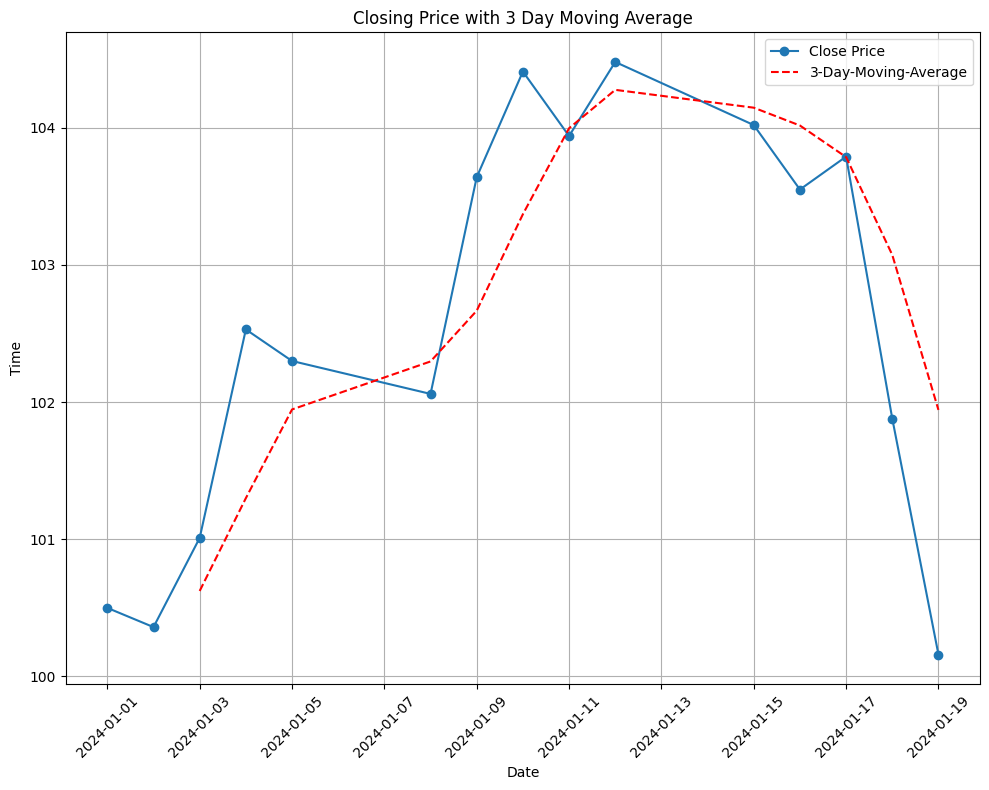

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['Close_Price'], label="Close Price", marker='o')
plt.plot(df['Date'], df['3_MA'], label="3-Day-Moving-Average", color="red", linestyle="--")

plt.title("Closing Price with 3 Day Moving Average")
plt.xlabel('Date')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

6. Plot the 5-day rolling volatility over time.

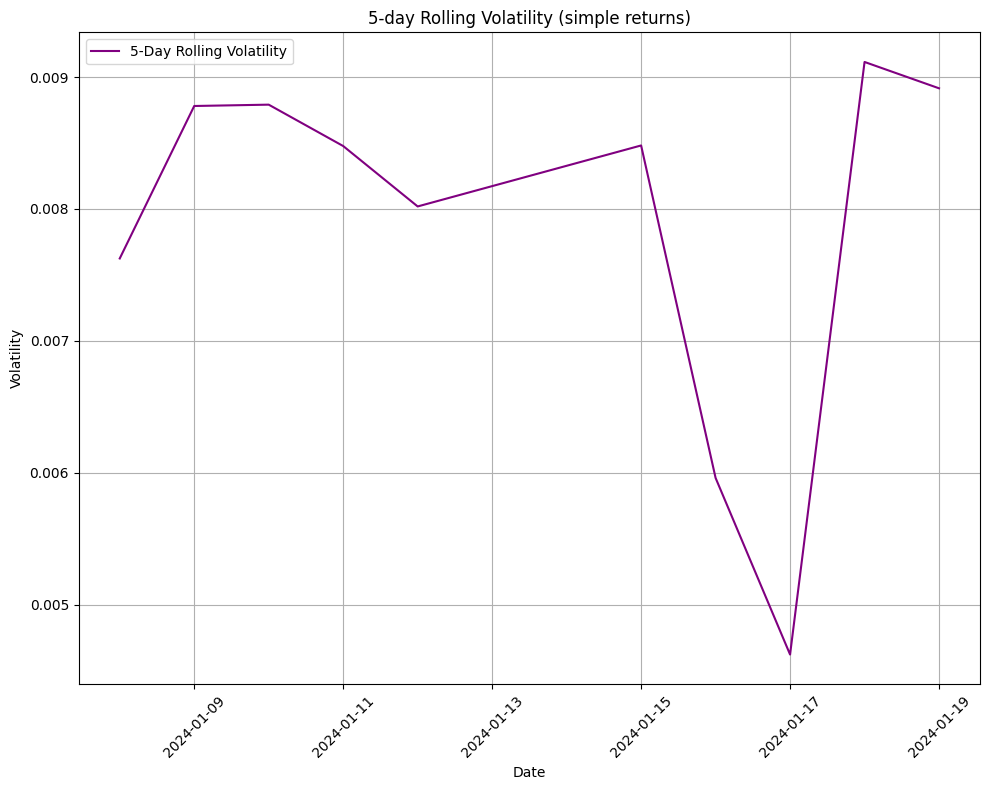

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(df['Date'], df['5_Day_Volatility'], label="5-Day Rolling Volatility", color="purple")

plt.title("5-day Rolling Volatility (simple returns)")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()